Linear model for time of fight

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../CSV Files/df_ufc_masters.csv')
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Blue,Winner_Red,better_rank_Blue,better_rank_Red,better_rank_neither
0,Thiago Santos,Johnny Walker,0.600000,0.434783,66.666667,130.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Alex Oliveira,Niko Price,0.370370,0.666667,170.000000,50.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Misha Cirkunov,Krzysztof Jotko,0.476190,0.565217,110.000000,76.923077,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Alexander Hernandez,Mike Breeden,0.870968,0.173913,14.814815,475.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Joe Solecki,Jared Gordon,0.574468,0.465116,74.074074,115.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Duane Ludwig,Darren Elkins,0.607843,0.425532,64.516129,135.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4890,John Howard,Daniel Roberts,0.677419,0.363636,47.619048,175.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4891,Brendan Schaub,Chase Gormley,0.722222,0.312500,38.461538,220.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4892,Mike Pierce,Julio Paulino,0.807692,0.229885,23.809524,335.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


array([[<Axes: title={'center': 'R_Height_cms'}>,
        <Axes: title={'center': 'R_Reach_cms'}>],
       [<Axes: title={'center': 'R_age'}>, <Axes: >]], dtype=object)

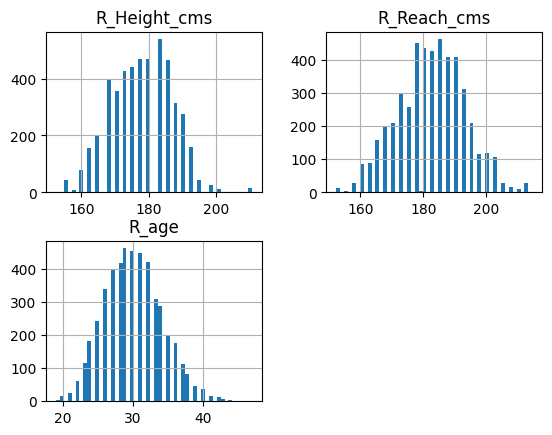

In [50]:
columns = ['R_Height_cms', 'R_Reach_cms', 'R_age']
df[columns].hist(bins=50)

In [51]:
features_min_max_sc = ['R_Height_cms', 'R_Reach_cms', 'R_age']

minmax_sc = MinMaxScaler()
minmax_sc.fit(df[features_min_max_sc])
df[['R_Height_mm', 'R_Reach_mm', 'R_age_mm']] = minmax_sc.transform(df[features_min_max_sc])

array([[<Axes: title={'center': 'R_Height_mm'}>,
        <Axes: title={'center': 'R_Reach_mm'}>],
       [<Axes: title={'center': 'R_age_mm'}>, <Axes: >]], dtype=object)

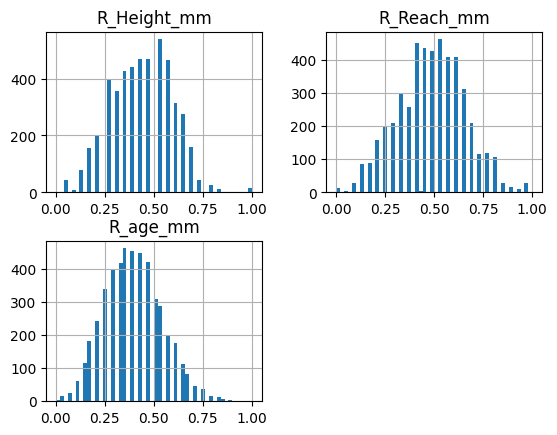

In [52]:
columns = ['R_Height_mm', 'R_Reach_mm', 'R_age_mm']
df[columns].hist(bins=50)

In [53]:
df.filter(regex='^R')

,R_fighter,R_odds,R_ev,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,...,R_age,R_match_weightclass_rank,R_Pound-for-Pound_rank,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,R_Height_mm,R_Reach_mm,R_age_mm
0,Thiago Santos,0.600000,66.666667,3,0,0,3.950000,0.480000,0.100000,0.610000,...,37,5.0,NaN,0.0,1.0,0.0,0.0,0.608696,0.653061,0.642857
1,Alex Oliveira,0.370370,170.000000,2,0,0,2.970000,0.510000,0.500000,2.270000,...,33,NaN,NaN,0.0,1.0,0.0,0.0,0.478261,0.653061,0.500000
2,Misha Cirkunov,0.476190,110.000000,1,0,0,3.770000,0.490000,1.700000,4.480000,...,34,NaN,NaN,0.0,1.0,0.0,0.0,0.652174,0.693878,0.535714
3,Alexander Hernandez,0.870968,14.814815,1,0,0,3.790000,0.360000,0.000000,1.570000,...,29,NaN,NaN,0.0,1.0,0.0,0.0,0.391304,0.489796,0.357143
4,Joe Solecki,0.574468,74.074074,0,4,0,2.640000,0.620000,0.600000,2.850000,...,28,NaN,NaN,0.0,1.0,0.0,0.0,0.391304,0.408163,0.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Duane Ludwig,0.607843,64.516129,1,0,0,13.666667,0.576667,0.000000,0.000000,...,31,NaN,NaN,0.0,1.0,0.0,0.0,0.434783,0.408163,0.428571
4890,John Howard,0.677419,47.619048,0,3,0,18.000000,0.550000,1.000000,4.666667,...,27,NaN,NaN,0.0,1.0,0.0,0.0,0.304348,0.448980,0.285714
4891,Brendan Schaub,0.722222,38.461538,1,0,0,12.000000,0.250000,0.000000,0.000000,...,27,NaN,NaN,0.0,1.0,0.0,0.0,0.695652,0.734694,0.285714
4892,Mike Pierce,0.807692,23.809524,1,0,0,40.500000,0.405000,0.000000,3.500000,...,29,NaN,NaN,0.0,1.0,0.0,0.0,0.347826,0.408163,0.357143


In [54]:
features_names = ['R_Height_mm', 'R_Reach_mm', 'R_age_mm']

X = np.c_[df[features_names]]
y = np.c_[df['Winner_Red']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train.reshape(-1))

LogisticRegression()

In [57]:
y_train_pred = model_lin.predict(X_train)
y_test_pred = model_lin.predict(X_test)

In [58]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'MAE train: {mae_train}')
print(f'MSE train: {mse_train}')
print(f'R2 train: {r2_train}')

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MAE test: {mae_test}')
print(f'MSE test: {mse_test}')
print(f'R2 test: {r2_test}')

MAE train: 0.4114942528735632
MSE train: 0.4114942528735632
R2 train: -0.6913165853509413
MAE test: 0.39427987742594484
MSE test: 0.39427987742594484
R2 test: -0.6316666666666666
